In [33]:
import pandas as pd
import numpy as np

In [34]:
# habitat ciudad turistica
df =pd.read_csv(r"C:\Users\JOSUE\Downloads\hackathon\hut_comunicacio_opendata.csv")

#  A continuacion imputaremos los siguientes codigos :
 Para ver la informacion Basica y visualizar si hay nulos , duplicados ,anomalias y datos que no aportan para su gestionamiento

In [35]:
df.shape

(9734, 21)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_EXPEDIENT                  9733 non-null   object 
 1   CODI_DISTRICTE               9733 non-null   float64
 2   DISTRICTE                    9733 non-null   object 
 3   CODI_BARRI                   9728 non-null   float64
 4   BARRI                        9722 non-null   object 
 5   TIPUS_CARRER                 9733 non-null   object 
 6   CARRER                       9733 non-null   object 
 7   TIPUS_NUM                    9733 non-null   float64
 8   NUM1                         9733 non-null   float64
 9   LLETRA1                      117 non-null    object 
 10  NUM2                         813 non-null    float64
 11  LLETRA2                      3 non-null      object 
 12  BLOC                         10 non-null     object 
 13  PORTAL            

In [37]:
df.describe()

,CODI_DISTRICTE,CODI_BARRI,TIPUS_NUM,NUM1,NUM2,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
count,9733.000000,9728.000000,9733.000000,9733.000000,813.000000,9682.000000,9733.000000,9733.000000
mean,3.887599,20.275493,1.468406,134.137881,122.193112,5.967465,2.164041,41.391311
std,2.791807,19.985339,0.499026,150.875594,134.530174,3.514939,0.018064,0.012716
min,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.092180,41.350747
25%,2.000000,7.000000,1.000000,24.000000,23.000000,4.000000,2.153364,41.380769
50%,2.000000,10.000000,1.000000,73.000000,71.000000,5.000000,2.163578,41.391700
75%,6.000000,31.000000,2.000000,201.000000,157.000000,7.000000,2.174010,41.400706
max,10.000000,73.000000,2.000000,1021.000000,1023.000000,79.000000,2.217988,41.450940


In [38]:
df.head(5)

,N_EXPEDIENT,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,LLETRA1,...,LLETRA2,BLOC,PORTAL,ESCALA,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
0,01-2013-0753,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,HOSPITAL,1.0,25.0,NaN,...,NaN,NaN,NaN,NaN,1,2,HUTB-000715,9.0,2.171125,41.379035
1,02-2014-0566,2.0,L'EIXAMPLE,6.0,la Sagrada Família,Avinguda,GAUDI,1.0,51.0,NaN,...,NaN,NaN,NaN,NaN,EN,1,HUTB-010412,7.0,2.173113,41.406595
2,02-2014-0207,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Plaça,TETUAN,1.0,33.0,NaN,...,NaN,NaN,NaN,NaN,SA,2,HUTB-008754,4.0,2.174958,41.393788
3,01-2014-0073,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,JUNTA DE COMERÇ,1.0,23.0,NaN,...,NaN,NaN,NaN,NaN,2,1A,HUTB-013228,4.0,2.170788,41.377598
4,02-2014-1125,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Gran Via,CORTS CATALANES,2.0,682.0,NaN,...,NaN,NaN,NaN,NaN,2,1,HUTB-011029,8.0,2.171954,41.390836


In [39]:
df.isnull().sum()

N_EXPEDIENT                       1
CODI_DISTRICTE                    1
DISTRICTE                         1
CODI_BARRI                        6
BARRI                            12
TIPUS_CARRER                      1
CARRER                            1
TIPUS_NUM                         1
NUM1                              1
LLETRA1                        9617
NUM2                           8921
LLETRA2                        9731
BLOC                           9724
PORTAL                         9694
ESCALA                         9031
PIS                              32
PORTA                           904
NUMERO_REGISTRE_GENERALITAT      35
NUMERO_PLACES                    52
LONGITUD_X                        1
LATITUD_Y                         1
dtype: int64

In [40]:
df.duplicated().sum()

0

Empezaremos por borrar las columnas que no contiene registros y no aportan

In [41]:
columnas_borrar = ['LLETRA1', 'NUM2', 'LLETRA2', 'BLOC', 'PORTAL', 'ESCALA']

In [42]:
df = df.drop(columns=columnas_borrar, errors='ignore')

Segundo Paso Eliminare todas las filas nulas y reseteare el index despues de haber borrado y empezare con las anomalias de cararcter 

In [43]:
df = df.dropna()

In [44]:
df = df.reset_index(drop=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_EXPEDIENT                  8753 non-null   object 
 1   CODI_DISTRICTE               8753 non-null   float64
 2   DISTRICTE                    8753 non-null   object 
 3   CODI_BARRI                   8753 non-null   float64
 4   BARRI                        8753 non-null   object 
 5   TIPUS_CARRER                 8753 non-null   object 
 6   CARRER                       8753 non-null   object 
 7   TIPUS_NUM                    8753 non-null   float64
 8   NUM1                         8753 non-null   float64
 9   PIS                          8753 non-null   object 
 10  PORTA                        8753 non-null   object 
 11  NUMERO_REGISTRE_GENERALITAT  8753 non-null   object 
 12  NUMERO_PLACES                8753 non-null   float64
 13  LONGITUD_X        

revisaremos una vez mas el df para ver que informacion necesitaremos y que nos puede servir y lo que no lo borraremos 

In [46]:
df.head(5)

,N_EXPEDIENT,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
0,01-2013-0753,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,HOSPITAL,1.0,25.0,1,2,HUTB-000715,9.0,2.171125,41.379035
1,02-2014-0566,2.0,L'EIXAMPLE,6.0,la Sagrada Família,Avinguda,GAUDI,1.0,51.0,EN,1,HUTB-010412,7.0,2.173113,41.406595
2,02-2014-0207,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Plaça,TETUAN,1.0,33.0,SA,2,HUTB-008754,4.0,2.174958,41.393788
3,01-2014-0073,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,JUNTA DE COMERÇ,1.0,23.0,2,1A,HUTB-013228,4.0,2.170788,41.377598
4,02-2014-1125,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Gran Via,CORTS CATALANES,2.0,682.0,2,1,HUTB-011029,8.0,2.171954,41.390836


Me he fijado que columna expediente contiene las fechas asi que la extraere solo la fecha la creare en una nueva columna mes y year y despues la pondre como mi indice y la alineare de manera descendente 

In [47]:
df['N_EXPEDIENT'].max()

'10-2023-0039'

In [48]:
df['N_EXPEDIENT'].min()

'01-2009-0354'

In [49]:
df['N_EXPEDIENT'] = pd.to_datetime(df['N_EXPEDIENT'].str.extract(r'(\d{2}-\d{4})', expand=False), format='%m-%Y')

df['Ano_Mes'] = df['N_EXPEDIENT'].dt.to_period('M')

df.set_index('Ano_Mes', inplace=True)
df.sort_index(ascending=False, inplace=True)


In [51]:
del df['N_EXPEDIENT']

In [52]:
df.head(5)

,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
Ano_Mes,,,,,,,,,,,,,,
2023-10,10.0,SANT MARTI,68.0,el Poblenou,Carrer,LLULL,2.0,140.0,1,1,HUTB-068086,1.0,2.197711,41.396500
2023-10,10.0,SANT MARTI,67.0,la Vila Olímpica del Poblenou,Carrer,ARQUITECTE SERT,1.0,29.0,3,1,HUTB-068084,1.0,2.195781,41.390586
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,2,B,HUTB-073535,1.0,2.180623,41.417185
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,3,A,HUTB-073546,1.0,2.180623,41.417185
2023-09,9.0,SANT ANDREU,57.0,la Trinitat Vella,Passatge,TORNE,1.0,1.0,3,2A,HUTB-071362,1.0,2.190938,41.447212


In [54]:
# Calcular la intensidad (número de lugares por zona)
df['Intensidad'] = df.groupby('BARRI')['NUMERO_PLACES'].transform('sum')

# Calcular los percentiles
df['Percentil'] = pd.qcut(df['Intensidad'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False, duplicates='drop') + 1

# Asignar un valor de 1 a 10 basado en los percentiles
df['Rating'] = pd.cut(df['Percentil'], bins=10, labels=False) + 1



In [56]:
df.head(20)

,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y,Intensidad,Percentil,Rating
Ano_Mes,,,,,,,,,,,,,,,,,
2023-10,10.0,SANT MARTI,68.0,el Poblenou,Carrer,LLULL,2.0,140.0,1,1,HUTB-068086,1.0,2.197711,41.396500,2025.0,4,4
2023-10,10.0,SANT MARTI,67.0,la Vila Olímpica del Poblenou,Carrer,ARQUITECTE SERT,1.0,29.0,3,1,HUTB-068084,1.0,2.195781,41.390586,648.0,2,2
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,2,B,HUTB-073535,1.0,2.180623,41.417185,95.0,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,3,A,HUTB-073546,1.0,2.180623,41.417185,95.0,1,1
2023-09,9.0,SANT ANDREU,57.0,la Trinitat Vella,Passatge,TORNE,1.0,1.0,3,2A,HUTB-071362,1.0,2.190938,41.447212,7.0,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,4,B,HUTB-073548,1.0,2.180623,41.417185,95.0,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,3,B,HUTB-073547,1.0,2.180623,41.417185,95.0,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,1,A,HUTB-073533,1.0,2.180623,41.417185,95.0,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,4,A,HUTB-073532,1.0,2.180623,41.417185,95.0,1,1


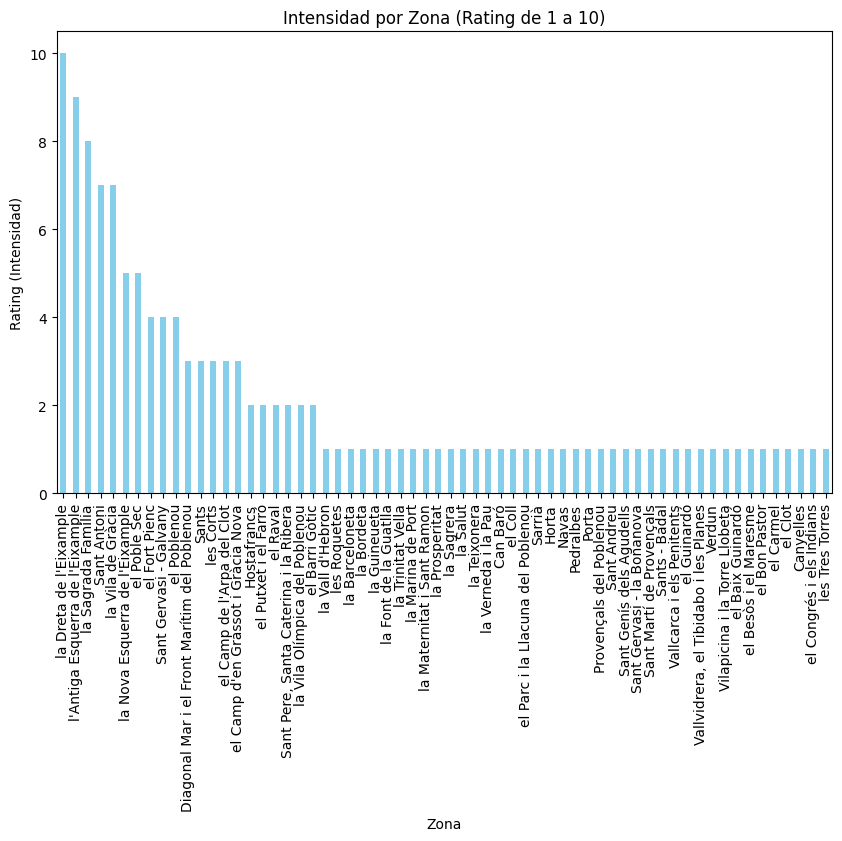

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
# Crear un gráfico de barras para visualizar la intensidad
plt.figure(figsize=(10, 6))
df.groupby('BARRI')['Rating'].max().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Intensidad por Zona (Rating de 1 a 10)')
plt.xlabel('Zona')
plt.ylabel('Rating (Intensidad)')
plt.show()


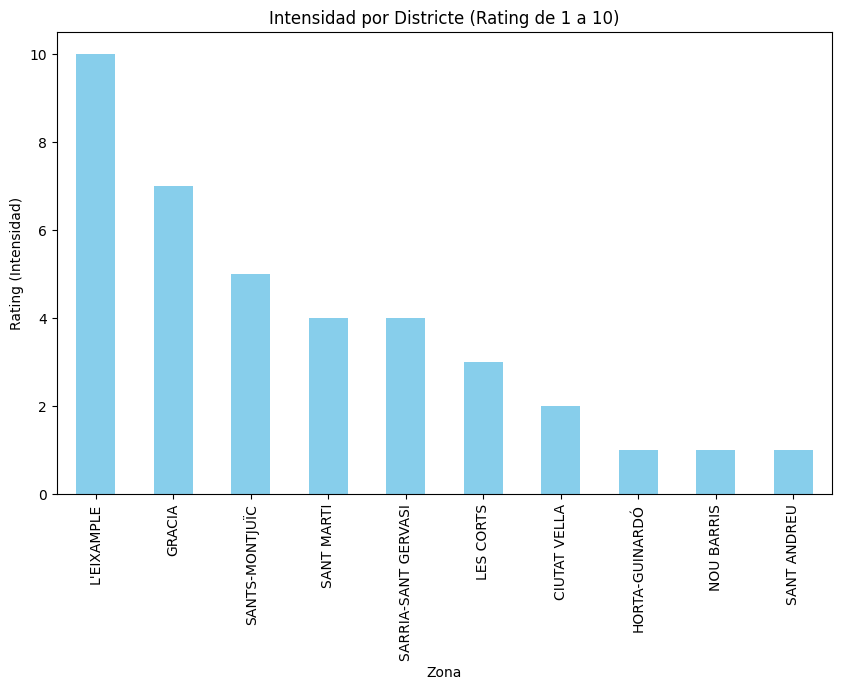

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
# Crear un gráfico de barras para visualizar la intensidad
plt.figure(figsize=(10, 6))
df.groupby('DISTRICTE')['Rating'].max().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Intensidad por Districte (Rating de 1 a 10)')
plt.xlabel('Zona')
plt.ylabel('Rating (Intensidad)')
plt.show()

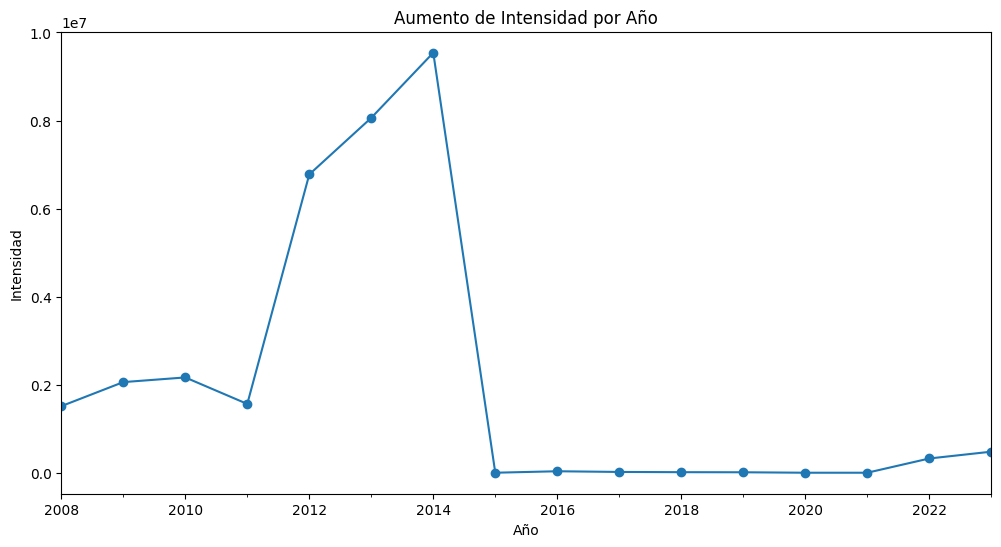

In [63]:
# Agrupar por año y sumar la intensidad
intensidad_por_ano = df.resample('Y')['Intensidad'].sum()

# Crear un gráfico de línea para visualizar la intensidad por año
plt.figure(figsize=(12, 6))
intensidad_por_ano.plot(marker='o')
plt.title('Aumento de Intensidad por Año')
plt.xlabel('Año')
plt.ylabel('Intensidad')
plt.show()

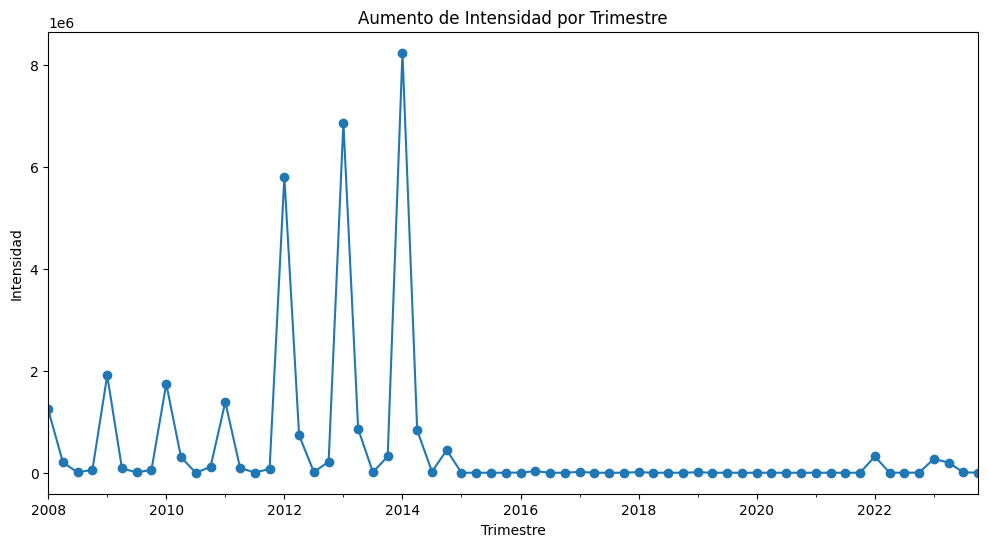

In [60]:
# Agrupar por trimestre y sumar la intensidad
intensidad_por_trimestre = df.resample('Q')['Intensidad'].sum()

# Crear un gráfico de línea para visualizar la intensidad por trimestre
plt.figure(figsize=(12, 6))
intensidad_por_trimestre.plot(marker='o')
plt.title('Aumento de Intensidad por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Intensidad')
plt.show()
